<a href="https://colab.research.google.com/github/Jayesh-Panchal/EDA-on-World-Bank-Global-Education/blob/main/WorldBankEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**World Bank Global Education Analysis**
***
The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

***In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights***

##**<u>The following Indicators have been chosen for analysis</u>:-**

**Early Childhood Education**
* Enrolment in early childhood education, both sexes (number) -**UIS.E.0.T**
* Percentage of enrolment in pre-primary education in private institutions (%) - **SE.PRE.PRIV.ZS**

**Expenditures**

* Government expenditure on education as % of GDP (%) - **SE.XPD.TOTL.GD.ZS** 
* Expenditure on education as % of total government expenditure (%) **SE.XPD.TOTL.GB.ZS**

**Literacy**

* Adult literacy rate, population 15+ years, both sexes (%) - SE.ADT.LITR.ZS
* Adult illiterate population, 15+ years, both sexes (number) - **UIS.LP.Ag15t99**

**Population**
* School age population, pre-primary education, both sexes (number)Education Equality - **SP.PRE.TOTL.IN**
* School age population, primary education, both sexes (number) - **SP.PRM.TOTL.IN**
* School age population, secondary education, both sexes (number) - **SP.SEC.TOTL.IN**
* School age population, tertiary education, both sexes (number) - **SP.TER.TOTL.IN**

In [ ]:
# List of selected indicators for analysis.
Indicators = ["UIS.E.0.T", "SE.PRE.PRIV.ZS",
              # Early Childhood Education
              "SE.XPD.TOTL.GD.ZS", "SE.XPD.TOTL.GB.ZS",
              # Expenditures
              "SE.ADT.LITR.ZS", "UIS.LP.AG15t99",
              # Literacy
              "SP.PRE.TOTL.IN","SP.PRM.TOTL.IN", "SP.SEC.TOTL.IN", "SP.TER.TOTL.IN"]
              # Population
len(Indicators)

10

##**<u>Also, Following Countries have been selected for Analysis</u>:-**
* **India->** IND
* **United States->** USA
* **United Kingdom->** GBR
* **Australia->** AUS
* **Germany->** DEU
* **South Africa->** ZAF
* **Canada->** CAN
* **Japan->** JPN
* **Sri Lanka->** LKA

In [ ]:
# List of countries that have been selected for analysis.
Countries = ["India", "United States", "United Kingdom", "Australia", "Germany", 
             "South Africa", "Canada", "Japan", "Sri Lanka"]
len(Countries)

9

Now, The first step would be to mount the drive in order to extract the Datasets present in the Drive folder.

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Necessary Modules and Libraries**

We are importing following libraries for their respective applications:


*   Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.
*   Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.



In [ ]:
# Importing packages like pandas, matplotlib and math for analysis, visualization and arithematical operations.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##**Loading and Discovering Data**
******
Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:


1.   **EdStatsData**:- This file contains Education Statistics data (from year 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc. 

In [ ]:
# The variable Data_path contains the path of dataset stored in drive. 
# This path is common for all files so this variable can be used multiple times to load respective files.

Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/World Bank Global Education Analysis/data/"

# Importing EdStatsData File.
EdStatsData = pd.read_csv(Data_path + "EdStatsData.csv")
# EdStatsData.head(3)
EdStatsData.shape

(886930, 70)

In [ ]:
# Using the describe function to analyze the nature and paradigm of EdStatsData.
EdStatsData.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


2.   **EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

In [ ]:
# Loading EdStatsCountry file.
EdStatsCountry = pd.read_csv(Data_path + "EdStatsCountry.csv")
# EdStatsCountry.head(3)
EdStatsCountry.shape

(241, 32)

In [ ]:
# Using to column attribute to see what type of information is stored in EdStatsCountry file.
EdStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

3.   **EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived



In [ ]:
# Loading EdStatsCountry_Series file.
EdStatsCountry_Series = pd.read_csv(Data_path + "EdStatsCountry-Series.csv")
# EdStatsCountry_Series.head(3)
EdStatsCountry_Series.shape

(613, 4)

In [ ]:
EdStatsCountry_Series.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

4.   **EdStatsFootNode**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.


In [ ]:
# Loading EdStatsFootNote file.
EdStatsFootNote = pd.read_csv(Data_path + "EdStatsFootNote.csv")
# Displaying first 3 rows.
EdStatsFootNote.head(3)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN


In [ ]:
# Number of rows and columns in EdStatsFootNote.
EdStatsFootNote.shape

(643638, 5)

5.   **EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. 

In [ ]:
# Loading EdStatsSeries file
EdStatsSeries = pd.read_csv(Data_path + "EdStatsSeries.csv")
EdStatsSeries.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Number of rows and columns in EdStatsSeries.
EdStatsSeries.shape

(3665, 21)

## **Data Pre-Processing & Mining for Indicators**
******
The Data mining is the process of extracting and discovering patterns in large data sets. Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it. Like here we have defined two functions, i.e, get_columnwise_data() and get_rowwise_data() to extract out column wise and row wise matrices respectively. Also the function performs some partial cleaning over data such that we only have rows and columns that has some meaningful data to hold. The columns that are all 'NaNs' are dropped such that the data remains cosistent and more skewed. Filling those null columns could effect the analysis, manipulating the graph with values that are not literal and are estimated in one way or the other. Since filling those nulls with a mean or 0, or using forward and backward fill methods, could not make up for the original value, and this is same for all countries so dropping such columns seemed to be the right choice.

In [ ]:
# Function to mine a columnwise sub dataset that would have the selected countries as columns with the
# set of meaningful years (those columns/Years that have at least one available value is considered) as rows.
# This type of data is suitable for plotting line charts and get meaningful insights accross the trends it produces.

def get_columnwise_data(indicator_code):
  # Loading the respective data for a particular indicator passed to the function.
  # here it will extract out the data for all available countries, we can narrow 
  # it down later to countries we have selected for analysis.
  df = EdStatsData[EdStatsData["Indicator Code"] == indicator_code]

  # Data respective to selected set of countries.
  df = df.loc[df['Country Name'].isin(Countries)]

  # Dropping columns with all 'NaNs'.
  df.dropna(how='all', axis = "columns", inplace=True)

  # Resetting indexes in the data since the previous indexes are now hard to follow up with.
  df.reset_index(inplace = True)

  # Extracting the Indicator Name. It can be used as Title while plotting the visualizations.
  title = df["Indicator Name"][0]

  # Dropping unnecessary columns, this will help us to only keep meaningful 
  # data that adds some value our visualizations.
  df.drop(labels = ["index", "Country Code", "Indicator Name", "Indicator Code"], axis = "columns", inplace = True)

  # Tranposing the dataframe in order to get country-wise columns that 
  # holds values across the years for a respective country.
  df = df.T

  # Again after transposing the previous indexes are meaningless because 
  # that cannot be used to index elements so we are resetting indexes again.
  df.reset_index(inplace=True)

  # The variable new_columns holds a list of column names for our new dataframe,
  # with first column being "Year" and rest all are country names respectively.
  new_columns = [ "Year", "Australia", "Canada", "Germany", "India", "Japan", "South Africa",
                 "Sri Lanka", "United Kingdom", "United States"]

  # Replacing the column names.
  df.set_axis(new_columns, axis=1, inplace = True)

  # Dropping first row since it holds country name column tranposed 
  # which is unnecessary at this point.
  df.drop(0, inplace = True)

  # Returning the required dataframe along with title of the Indicator.
  return df, title
    
    
# Follwoing is the function to mine the data in a row wise manner such that we have years
# as columns and countries as respective rows. This type of data is helps to plot
# graphical display of data using bars of different heights and analyse trends over time.

def get_rowwise_data(indicator_code):
  # Calling get_columnwise_data() with the given indicator code in order to get a column wise dataframe first.
  # Later we can convert it into a rowwise dataframe by performing a few opeations over it.
  df, title = get_columnwise_data(indicator_code)

  # Extracting the year list so that it can be used later to get column names.
  cols = list(df["Year"])

  # Transposing the dataframe.
  df = df.T

  # Resetting Indexes again bacause we performed tranpose operation over dataframe.
  df.reset_index(inplace=True)

  # Setting new column names (Years).
  df.set_axis((["Country Name"] + cols), axis=1, inplace = True)

  # dropping 0th row (contains list of years).
  df.drop(0, inplace = True)

  # Returning the dataframe and Indicator title.
  return df, title

**Now, lets just check if the function works as expected. Below is a test run for both functions. We can also use the information retrieved here for future operations on the indicator used.**

In [ ]:
# Calling get_rowwise_data() on the indicator present at index 1 in the Indicators list.
# This Indicator is described as "Percentage of enrolment in pre-primary education in private institutions (%)".
# This is just to test if the function is returning the required results.
temp, t = get_rowwise_data(Indicators[1])

# Printing Title of the Indicator.
print(t)

# displaying the dataframe.
temp

Percentage of enrolment in pre-primary education in private institutions (%)


,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Australia,NaN,NaN,NaN,21.940889,19.49725,18.816019,18.76877,19.001471,21.520741,...,82.214394,76.055313,76.109612,76.181961,74.971039,75.488731,77.960312,63.19355,76.956863,79.417313
2,Canada,2.6436,2.35687,2.26478,2.00116,2.5621,2.47142,2.57639,2.46426,2.53272,...,5.82034,5.8204,5.94721,7.04114,6.98907,6.66803,6.61498,6.78393,NaN,NaN
3,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.697632,63.44762,64.292572,64.387413,64.814934,65.148041,65.071739,65.302299,64.922462,64.761009
4,India,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.341537,76.528137,74.440773
5,Japan,75.363518,75.923576,76.596039,75.941681,75.692436,75.10585,74.490334,74.193039,73.799019,...,66.647926,67.364349,68.186142,69.000183,69.618698,70.331718,71.319504,71.864059,72.700996,NaN
6,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.64807,5.36282,5.25834,5.82277,6.38362,6.09963,6.14065,6.25073,NaN
7,Sri Lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.52742,1.56085,2.66747,2.77128,3.18726,3.1882
8,United Kingdom,NaN,NaN,NaN,NaN,NaN,5.39608,NaN,NaN,NaN,...,29.042259,NaN,29.47846,28.14855,20.978951,28.84973,37.463909,52.896641,45.159859,NaN
9,United States,30.232559,31.34041,NaN,31.81818,NaN,33.1064,31.89793,33.333328,35.416672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.94574,40.444901


It is evident from the above table that our functions are working exactly as expected. The dataframe returned has all years as columns, that have at least one not-null value. Though the data still has a lot of 'NaN' values, but those we can handle later. 

Here we called *get_rowwise_data()* because it implicitly calls the *get_columnwise_data()* to get a columnwise data matric, then its converted to rowwise matric by further operation, this way we can test if both the functions are working as desired.

##**Data Analysis and Visualization**
******
Now that we know how to extract the meaningful chunk out of the huge dataset, we can proceed to analyze and visualize the data to get some insights and figure out trends and patterns over it.

So, the first Category to perform analysis on is *Early Childhood Education*.


###**Early Childhood Education**
*****

Early childhood education (ECE), also called nursery education, refers to the branch of education theory that relates to the teaching of children from birth up to the age of eight. In most cases its refered equivalent to 3rd Grade. 

Quality of early childhood education can reflect a significant contribution to the physical, psychomotor, cognitive, social and emotional development of the child, including the acquisition of languages and early age knowledge, which in a long run would reflect towards the countries literacy. The first eight years of a child's life is a period of tremendous growth and development.

**As mentioned before we have selected two indicators from this category. Following is the respective analysis based on those indicators:-**

1. **Enrolment in early childhood education, both sexes.**



In [ ]:
# Calling get_columnwise_data() to get a columnwise matrix along with the title 
# for first indicator in the 'Indicators' list.
Indicator1 , Title1  = get_columnwise_data(Indicators[0])

# Displaying Title of Indicator.
print(Title1)

# Displaying the DataFrame recieved.
Indicator1

Enrolment in early childhood education, both sexes (number)


,Year,Australia,Canada,Germany,India,Japan,South Africa,Sri Lanka,United Kingdom,United States
1,1999,NaN,NaN,2332585.0,NaN,NaN,NaN,NaN,NaN,7183122.0
2,2000,NaN,NaN,2297821.0,NaN,3425697.0,NaN,NaN,NaN,7110066.0
3,2001,272996.0,NaN,2398104.0,2617403.0,3463487.0,NaN,NaN,NaN,7538720.0
4,2002,263541.0,NaN,2352829.0,4623168.0,3492456.0,518985.0,NaN,NaN,7667685.0
5,2003,211627.0,NaN,2316687.0,5507559.0,3555478.0,NaN,NaN,NaN,NaN
6,2004,214059.0,NaN,2238270.0,5050006.0,3586547.0,NaN,NaN,NaN,7435568.0
7,2005,221672.0,NaN,2232306.0,4761485.0,3615999.0,685749.0,NaN,NaN,7361682.0
8,2006,212998.0,NaN,2443550.0,5264053.0,3630184.0,NaN,NaN,989596.0,7342289.0
9,2007,212402.0,486874.0,2420124.0,5366340.0,3614874.0,NaN,NaN,1004677.0,7512518.0
10,2008,215526.0,NaN,2410081.0,6576483.0,3606830.0,NaN,NaN,1108148.0,7191333.0


*The DataFrame seems just about right, we can proceed with further operations as follows:-*

In [ ]:
# Now we need to replace the 'NaN' entries with some meaningful 
# value since they might affect the visualization to make it inconsistent.

# Firstly using a fillna() with 'ffill' method to perform upward fill for 'NaN' values, 
# this will fill 'NaN' with the nearest value above it in the column.
Indicator1.fillna(method = "ffill", inplace = True)

# Now using a fillna() with 'bfill' method to perform downward fill for 'NaN' values,
# this will fill 'NaN' with the nearest value below it in the column.
Indicator1.fillna(method = "bfill", inplace = True)

# Matric after filling NaNs.
Indicator1

,Year,Australia,Canada,Germany,India,Japan,South Africa,Sri Lanka,United Kingdom,United States
1,1999,272996.0,486874.0,2332585.0,2617403.0,3425697.0,518985.0,293093.0,9.895960e+05,7.183122e+06
2,2000,272996.0,486874.0,2297821.0,2617403.0,3425697.0,518985.0,293093.0,9.895960e+05,7.110066e+06
3,2001,272996.0,486874.0,2398104.0,2617403.0,3463487.0,518985.0,293093.0,9.895960e+05,7.538720e+06
4,2002,263541.0,486874.0,2352829.0,4623168.0,3492456.0,518985.0,293093.0,9.895960e+05,7.667685e+06
5,2003,211627.0,486874.0,2316687.0,5507559.0,3555478.0,518985.0,293093.0,9.895960e+05,7.667685e+06
6,2004,214059.0,486874.0,2238270.0,5050006.0,3586547.0,518985.0,293093.0,9.895960e+05,7.435568e+06
7,2005,221672.0,486874.0,2232306.0,4761485.0,3615999.0,685749.0,293093.0,9.895960e+05,7.361682e+06
8,2006,212998.0,486874.0,2443550.0,5264053.0,3630184.0,685749.0,293093.0,9.895960e+05,7.342289e+06
9,2007,212402.0,486874.0,2420124.0,5366340.0,3614874.0,685749.0,293093.0,1.004677e+06,7.512518e+06
10,2008,215526.0,486874.0,2410081.0,6576483.0,3606830.0,685749.0,293093.0,1.108148e+06,7.191333e+06


Now the matrix is completely filled and we can start visualizing it. We've used a line plot to visualize this particular indicator because we are looking for patterns and insights over the years for the selected countries and line graph would help to find trends across various countries.

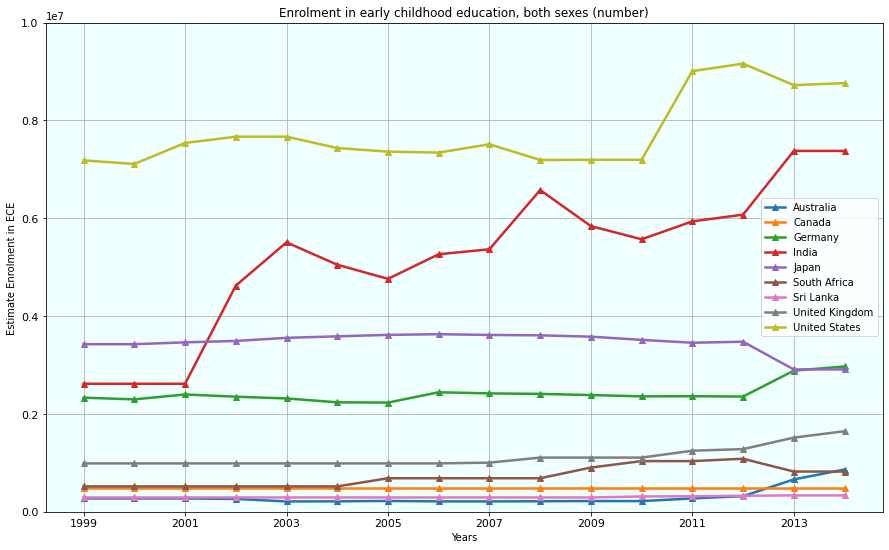

In [ ]:
# Using plot() from pandas module to plot a line graph, 
# this plot function is just the extension to the plot() in matplotlib.

Indicator1.plot(x = "Year", kind='line', title = Title1, 
                xlabel = "Years", ylabel = "Estimate Enrolment in ECE",
                ylim = (0, 1e7), figsize=(15,9), fontsize = 11,
                grid = True, linewidth = 2.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

# Above function will create and display the graph after successful execution. 
# Also we've called another function i.e., patch.set_facecolor() with the plot object, 
# this helps us to change the background colour of the plot.
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# ylim:- Limit for Y-axis values.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# marker:- used to show a trend or mark an important value.

**Observations:**
********

We are able to observe that the **United states** has some fluctuations in the trend may be due to the subprime crisis in U.S in the year 2007 to 2010  and we can see the significant leap happening in the period 2010 - 2012, followed by a minor drop. Overall the trend for USA seemed to be consistently showing positive growth. Part of the reason why USA is so developed is because they focus a lot towards early age education of childrens, which contributes significantly to the overall literacy. 

For **India**, we observe significant leaps in the periods 2001-2003, 2005-2008 and also at 2010-2013, and we are able to notice that the slopes and degrees of hills are more significant than the slopes and degrees of the valleys, which shows positive signs of growth. India is a developing country and with the above chart, it is evident that sooner or later India would lead the graph in coming years, second only to China. 

For **Japan** and **Germany**, we see minor fluctuations throughout, and significant changes in the period 2012-2013. we see a climb for *Germany*, and a drop for *Japan*. Japan has a rigirous process of early education such that students enrol to a school after the age of 8. This clearly affect their rate of early education enrolment rate. 

We also see a consitent growth trend for the **United Kingdom**, with no drastic movements. 

Also **South Africa** shows a positive trend for the period 2004-2014, and then has a minor drop. 

**Canada** and **Sri Lanka** doesn't show any major growth or decline, while **Australia** shows a significant growth in the recent years from 2012 onwards.

*Note:* We haven't included **China** for analysis. Reason being the graph for China was overfitting the charts and overshadowing other countries, Which made it hard to analyze trends across other countries. It is clear China is way ahead of other countries. Hence, we selected countries that are homogenous to India.

2. **Percentage of enrolment in pre-primary education in private institutions.**

In [ ]:
# Here we can directly pass the values as 'temp' and 't', 
# since we extracted those values during test run, there's no need to call the same function again.
# Since its a percentage(%) data hence we are extracting it in row-wise manner
# such that "Years" would be columns and we can select columns for analysis asper required.

Indicator2 , Title2  = temp, t

# Displaying Title of Indicator.
print(Title2)

# Displaying the DataFrame recieved.
Indicator2

Percentage of enrolment in pre-primary education in private institutions (%)


,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Australia,NaN,NaN,NaN,21.940889,19.49725,18.816019,18.76877,19.001471,21.520741,...,82.214394,76.055313,76.109612,76.181961,74.971039,75.488731,77.960312,63.19355,76.956863,79.417313
2,Canada,2.6436,2.35687,2.26478,2.00116,2.5621,2.47142,2.57639,2.46426,2.53272,...,5.82034,5.8204,5.94721,7.04114,6.98907,6.66803,6.61498,6.78393,NaN,NaN
3,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.697632,63.44762,64.292572,64.387413,64.814934,65.148041,65.071739,65.302299,64.922462,64.761009
4,India,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.341537,76.528137,74.440773
5,Japan,75.363518,75.923576,76.596039,75.941681,75.692436,75.10585,74.490334,74.193039,73.799019,...,66.647926,67.364349,68.186142,69.000183,69.618698,70.331718,71.319504,71.864059,72.700996,NaN
6,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.64807,5.36282,5.25834,5.82277,6.38362,6.09963,6.14065,6.25073,NaN
7,Sri Lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.52742,1.56085,2.66747,2.77128,3.18726,3.1882
8,United Kingdom,NaN,NaN,NaN,NaN,NaN,5.39608,NaN,NaN,NaN,...,29.042259,NaN,29.47846,28.14855,20.978951,28.84973,37.463909,52.896641,45.159859,NaN
9,United States,30.232559,31.34041,NaN,31.81818,NaN,33.1064,31.89793,33.333328,35.416672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.94574,40.444901


In [ ]:
# Now, we need to replace 'NaN' values from the matrix. Here we are using a column mean to fill null values
# since average of values provide a better estimation for the type of data we have in a row wise matrix.
# Also we are selecting limited number of columns for analysis so the repetative mean values won't affect
# much of our visualization.
Indicator2.fillna(Indicator2.mean(), inplace = True)

# Displaying cleaned matrix.
Indicator2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Australia,27.059919,27.405214,26.286940,21.940889,19.497250,18.816019,18.768770,19.001471,21.520741,...,82.214394,76.055313,76.109612,76.181961,74.971039,75.488731,77.960312,63.193550,76.956863,79.417313
2,Canada,2.643600,2.356870,2.264780,2.001160,2.562100,2.471420,2.576390,2.464260,2.532720,...,5.820340,5.820400,5.947210,7.041140,6.989070,6.668030,6.614980,6.783930,48.331506,52.450439
3,Germany,27.059919,27.405214,26.286940,32.925478,32.583929,26.979154,31.933356,32.248024,33.317288,...,62.697632,63.447620,64.292572,64.387413,64.814934,65.148041,65.071739,65.302299,64.922462,64.761009
4,India,0.000000,0.000000,0.000000,32.925478,32.583929,26.979154,31.933356,32.248024,33.317288,...,49.284510,43.667151,41.562803,41.669598,34.960412,36.347246,38.171078,79.341537,76.528137,74.440773
5,Japan,75.363518,75.923576,76.596039,75.941681,75.692436,75.105850,74.490334,74.193039,73.799019,...,66.647926,67.364349,68.186142,69.000183,69.618698,70.331718,71.319504,71.864059,72.700996,52.450439
6,South Africa,27.059919,27.405214,26.286940,32.925478,32.583929,26.979154,31.933356,32.248024,33.317288,...,49.284510,5.648070,5.362820,5.258340,5.822770,6.383620,6.099630,6.140650,6.250730,52.450439
7,Sri Lanka,27.059919,27.405214,26.286940,32.925478,32.583929,26.979154,31.933356,32.248024,33.317288,...,49.284510,43.667151,41.562803,41.669598,1.527420,1.560850,2.667470,2.771280,3.187260,3.188200
8,United Kingdom,27.059919,27.405214,26.286940,32.925478,32.583929,5.396080,31.933356,32.248024,33.317288,...,29.042259,43.667151,29.478460,28.148550,20.978951,28.849730,37.463909,52.896641,45.159859,52.450439
9,United States,30.232559,31.340410,26.286940,31.818180,32.583929,33.106400,31.897930,33.333328,35.416672,...,49.284510,43.667151,41.562803,41.669598,34.960412,36.347246,38.171078,43.536743,40.945740,40.444901


The matrix seems ready to visualize. We have used used a 'Bar' graph to viualize this indicator with years- 1985, 2000 and 2015 into consideration, representing growth over the peried of 30 years.

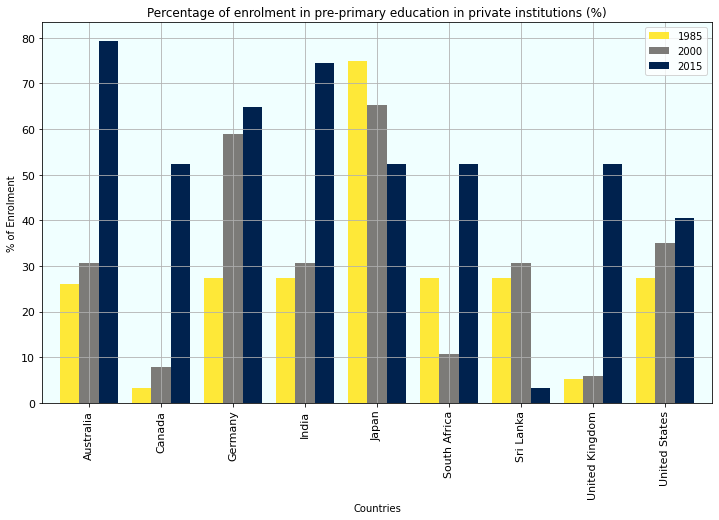

In [ ]:
# Plotting the graph.
Indicator2.plot(x = "Country Name", y = ["1985","2000","2015"],
                xlabel = "Countries", ylabel = "% of Enrolment",
                kind='bar', title = Title2, figsize=(12,7), 
                grid = True, colormap= "cividis_r",width = 0.8,
                fontsize=11).patch.set_facecolor('#f0ffff')
# Above statement will create and display the graph.
# y:- list of years selected.
# colormap:- colour scheme for the bars.
# width:- Bar width.

**Observations:**
***
##################################################################

###**Expenditures**
*****
It signifies the amount spent by federal government on public educational institutions and other education related institutions. Education plays a very important role for a country to be able to
absorb technology and develop the capacity for the realization
of development and sustainable growth. Also, Human capital is a
productive investment in people that includes knowledge,
skills, abilities, ideas, health which often results from
expenditures in education.

1. **Government expenditure on education as % of GDP.**

In [ ]:
# Extracting Indicator matrix.
Indicator3 , Title3  = get_columnwise_data(Indicators[2])

# Displaying Title of Indicator.
print(Title3)

# Displaying the DataFrame recieved.
Indicator3

Government expenditure on education as % of GDP (%)


,Year,Australia,Canada,Germany,India,Japan,South Africa,Sri Lanka,United Kingdom,United States
1,1971,NaN,7.71019,NaN,NaN,3.71648,NaN,NaN,5.03205,NaN
2,1972,NaN,7.63406,NaN,NaN,4.07991,NaN,NaN,5.15938,NaN
3,1973,NaN,7.03377,NaN,NaN,4.11199,NaN,3.3164,5.44861,NaN
4,1974,NaN,6.70673,NaN,NaN,4.12426,NaN,NaN,5.391,NaN
5,1975,NaN,6.43802,NaN,NaN,4.73971,NaN,2.74455,6.26878,NaN
6,1976,NaN,6.71431,NaN,NaN,4.93977,NaN,NaN,6.44037,NaN
7,1977,NaN,6.72308,NaN,NaN,4.92031,NaN,NaN,6.0845,NaN
8,1978,6.01461,7.09923,NaN,NaN,4.98988,NaN,NaN,NaN,NaN
9,1979,5.89238,6.72539,NaN,NaN,5.13707,NaN,2.56743,NaN,NaN
10,1980,5.6822,6.47863,NaN,NaN,5.1624,NaN,2.70417,5.07729,NaN


In [ ]:
# Cleaning data to replace null values using backward and forward filling methods.
# First using "ffill" on data.
Indicator3.fillna(method = "ffill", inplace = True)

# now using "bfill" on data.
Indicator3.fillna(method = "bfill", inplace = True)

# Displaying cleaned matrix.
Indicator3

,Year,Australia,Canada,Germany,India,Japan,South Africa,Sri Lanka,United Kingdom,United States
1,1971,6.01461,7.71019,4.41016,3.30847,3.71648,5.34765,3.31640,5.03205,4.58326
2,1972,6.01461,7.63406,4.41016,3.30847,4.07991,5.34765,3.31640,5.15938,4.58326
3,1973,6.01461,7.03377,4.41016,3.30847,4.11199,5.34765,3.31640,5.44861,4.58326
4,1974,6.01461,6.70673,4.41016,3.30847,4.12426,5.34765,3.31640,5.39100,4.58326
5,1975,6.01461,6.43802,4.41016,3.30847,4.73971,5.34765,2.74455,6.26878,4.58326
6,1976,6.01461,6.71431,4.41016,3.30847,4.93977,5.34765,2.74455,6.44037,4.58326
7,1977,6.01461,6.72308,4.41016,3.30847,4.92031,5.34765,2.74455,6.08450,4.58326
8,1978,6.01461,7.09923,4.41016,3.30847,4.98988,5.34765,2.74455,6.08450,4.58326
9,1979,5.89238,6.72539,4.41016,3.30847,5.13707,5.34765,2.56743,6.08450,4.58326
10,1980,5.68220,6.47863,4.41016,3.30847,5.16240,5.34765,2.70417,5.07729,4.58326


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17b813d590>,
      dtype=object)

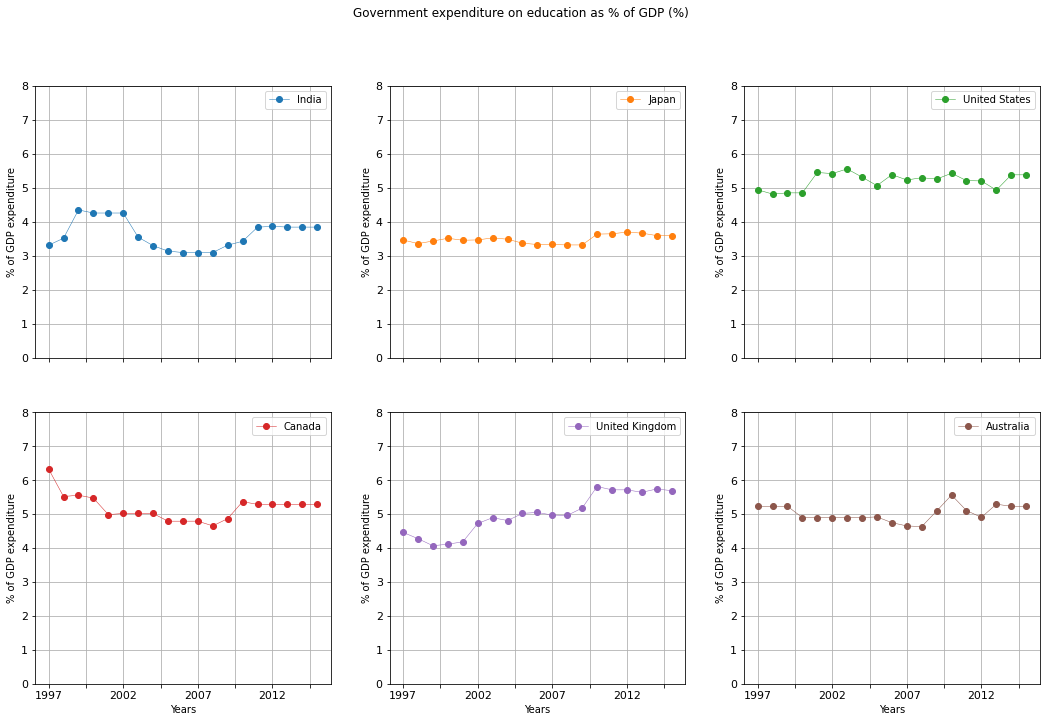

In [ ]:
# Plotting the graph. 
Indicator3[26:].plot(x = "Year", y = ["India", "Japan", "United States", "Canada", "United Kingdom", "Australia" ],
                kind = 'line', title = Title3, 
                xlabel = "Years", ylabel = "% of GDP expenditure",
                subplots = True, layout = (2,3),
                ylim = (0, 8), linewidth = 0.5, 
                figsize = (18,11), fontsize = 11, 
                marker = "o", grid = True)

# we are using a line graph here for this indicator. we have narrowed 
# down the analysis for this indicator to only 6 countries that seemed
# relevent for comparison with India. 
# We have used 'subplots' attribute to specify that we need to plot 
# countries as subplots instead of all of them on same graph, hence set to True.
# also 'layout' specifies the matric structure of subplots.

**Observations:**
******
######################################################

2. **Expenditure on education as % of total government expenditure.**

In [ ]:
# Extracting data in a rowwise manner.
Indicator4 , Title4  = get_rowwise_data(Indicators[3])

# Displaying Title of Indicator.
print(Title4)

# Displaying the DataFrame recieved.
Indicator4

Expenditure on education as % of total government expenditure (%)


,Country Name,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.24973,13.35092,...,13.1782,13.03027,12.59972,13.41502,14.3276,13.50202,13.18365,14.04586,13.9001,NaN
2,Canada,15.5789,15.53181,14.77497,14.0908,13.23688,12.6832,13.45583,13.53854,13.56977,...,NaN,12.32856,12.00996,12.48364,12.33596,12.21914,NaN,NaN,NaN,NaN
3,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.57416,10.14314,10.11993,10.25824,10.39811,10.75331,11.1373,11.03681,11.13874,NaN
4,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.78109,NaN,NaN,10.82184,11.74278,13.67652,14.06268,14.09096,NaN,NaN
5,Japan,16.08354,15.64062,14.91423,NaN,NaN,NaN,18.16979,17.993971,17.84712,...,10.15117,10.04298,10.32735,NaN,9.45758,9.70961,9.48014,9.57815,9.2867,NaN
6,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.68185,18.382151,17.906309,18.306259,18.044371,18.921619,20.622219,19.17124,19.130341,NaN
7,Sri Lanka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.27079,8.60566,9.11016,8.39403,9.31442,10.78201,10.95026
8,United Kingdom,12.64421,11.60222,11.40756,11.20601,10.45942,10.21579,10.50665,10.78651,11.13732,...,13.20349,12.99469,12.94575,12.60627,12.95248,12.70114,NaN,12.9258,13.65984,13.88024
9,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.1583,14.54073,13.9761,12.88782,13.05514,12.93341,13.3863,13.28636,14.5482,NaN


In [ ]:
# Filling Null values with column wise mean.
Indicator4.fillna(Indicator4.mean(), inplace = True)

# Displaying cleaned matrix.
Indicator4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Country Name,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,Australia,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.249730,13.350920,...,13.178200,13.030270,12.599720,13.415020,14.327600,13.502020,13.183650,14.04586,13.900100,12.41525
2,Canada,15.578900,15.531810,14.77497,14.090800,13.23688,12.683200,13.45583,13.538540,13.569770,...,13.246894,12.328560,12.009960,12.483640,12.335960,12.219140,12.895188,12.93120,13.206561,12.41525
3,Germany,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.892188,13.976282,...,9.574160,10.143140,10.119930,10.258240,10.398110,10.753310,11.137300,11.03681,11.138740,12.41525
4,India,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.892188,13.976282,...,11.781090,13.066074,12.840731,10.821840,11.742780,13.676520,14.062680,14.09096,13.206561,12.41525
5,Japan,16.083540,15.640620,14.91423,12.648405,11.84815,11.449495,18.16979,17.993971,17.847120,...,10.151170,10.042980,10.327350,12.381235,9.457580,9.709610,9.480140,9.57815,9.286700,12.41525
6,South Africa,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.892188,13.976282,...,19.681850,18.382151,17.906309,18.306259,18.044371,18.921619,20.622219,19.17124,19.130341,12.41525
7,Sri Lanka,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.892188,13.976282,...,13.246894,13.066074,12.840731,8.270790,8.605660,9.110160,8.394030,9.31442,10.782010,10.95026
8,United Kingdom,12.644210,11.602220,11.40756,11.206010,10.45942,10.215790,10.50665,10.786510,11.137320,...,13.203490,12.994690,12.945750,12.606270,12.952480,12.701140,12.895188,12.92580,13.659840,13.88024
9,United States,14.768883,14.258217,13.69892,12.648405,11.84815,11.449495,14.04409,13.892188,13.976282,...,15.158300,14.540730,13.976100,12.887820,13.055140,12.933410,13.386300,13.28636,14.548200,12.41525


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f17b8253fd0>,
      dtype=object)

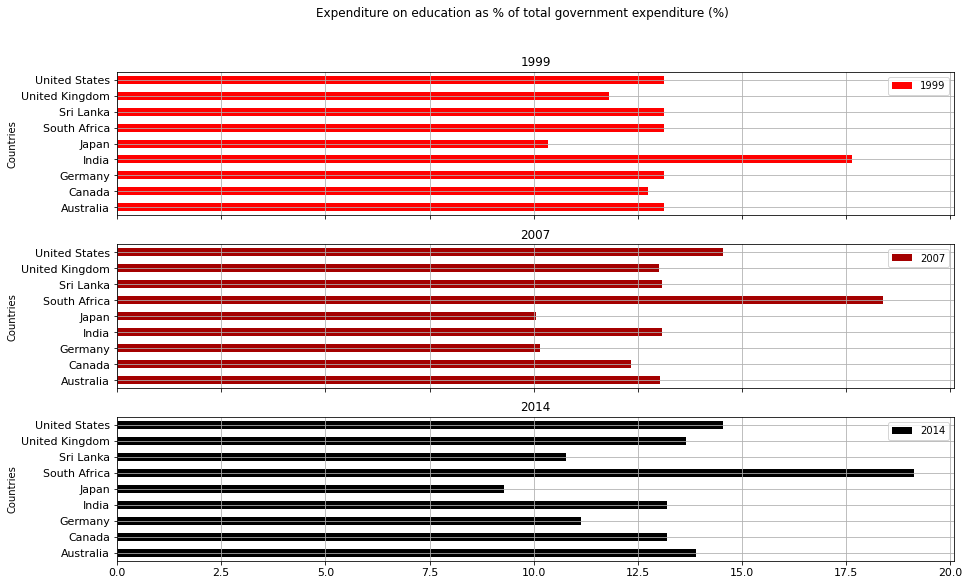

In [ ]:
# 
Indicator4.plot(x = "Country Name", y = ["1999", "2007", "2014"], kind = 'barh', title = Title4, 
                xlabel = "Countries", ylabel = "% of Gov. Expenditure",
                ylim = (0, 25), figsize=(15,9), fontsize = 11,
                colormap = "flag", subplots= True, grid = True)


**Observations:**
*******
#############################################################

###**Literacy**
****
Literacy is the process of expanding one's knowledge of reading and writing in order to develop their thinking and learning for the purpose of understanding themselves and the world.
Higher literacy rates are associated with high populations, less crime rates, greater economic growth, and higher employment rates. For a person, literacy is a foundational skill required to acquire advanced skills.

1.  **Adult literacy rate, population 15+ years, both sexes** 




2. **Adult illiterate population, 15+ years, both sexes** 

In [ ]:
tempdf2 = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.REA'].copy()

col = tempdf2.loc[: , "1970":"2100"]

tempdf2['PISA_REA_mean'] = col.mean(axis=1)


tempdf2 = tempdf2[pd.notnull(tempdf2['PISA_REA_mean'])]

PISA_REA = tempdf2[['Country Name', 'PISA_REA_mean']]

PISA_REA=PISA_REA.set_index('Country Name')

PISA_REA = PISA_REA.sort_values(by="PISA_REA_mean", ascending = False)

PISA_REA.plot(kind='bar',figsize=(30, 15))

In [ ]:
tempdf3 = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.MAT'].copy()

col = tempdf3.loc[: , "1970":"2100"]

tempdf3['PISA_MAT_mean'] = col.mean(axis=1)


tempdf3 = tempdf3[pd.notnull(tempdf3['PISA_MAT_mean'])]

PISA_MAT = tempdf3[['Country Name', 'PISA_MAT_mean']]

PISA_MAT=PISA_MAT.set_index('Country Name')

PISA_MAT = PISA_MAT.sort_values(by="PISA_MAT_mean")

PISA_MAT.plot(kind='bar',figsize=(30, 15))